In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Chris씨의 리더보드 점수 많이 올리는 결측치 제거 방법은 수치형은 -999로 채우는 방법이 있다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [ ]:
train_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/train_transaction.csv")
train_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/train_identity.csv")
test_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/test_transaction.csv")
test_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/test_identity.csv")

In [ ]:
train_data = pd.merge(train_trans, train_idf, how = 'left', on = 'TransactionID')

In [ ]:
# train_data 590540 # test_data 506691

506691

In [ ]:
train_data.isna().sum().sort_values(ascending = False)

id_24             585793
id_25             585408
id_08             585385
id_07             585385
id_21             585381
id_26             585377
id_22             585371
dist2             552913
D7                551623
id_18             545427
D13               528588
D14               528353
D12               525823
id_03             524216
id_04             524216
D6                517353
id_09             515614
D9                515614
D8                515614
id_10             515614
id_14             510496
V147              508595
V157              508595
V149              508595
V148              508595
V163              508595
V161              508595
V146              508595
V140              508595
V155              508595
V154              508595
V139              508595
V138              508595
V162              508595
V158              508595
V156              508595
V153              508595
V141              508595
V142              508595
V144              508589


In [ ]:
test_data = pd.merge(test_trans, test_idf, how = 'left', on = 'TransactionID')

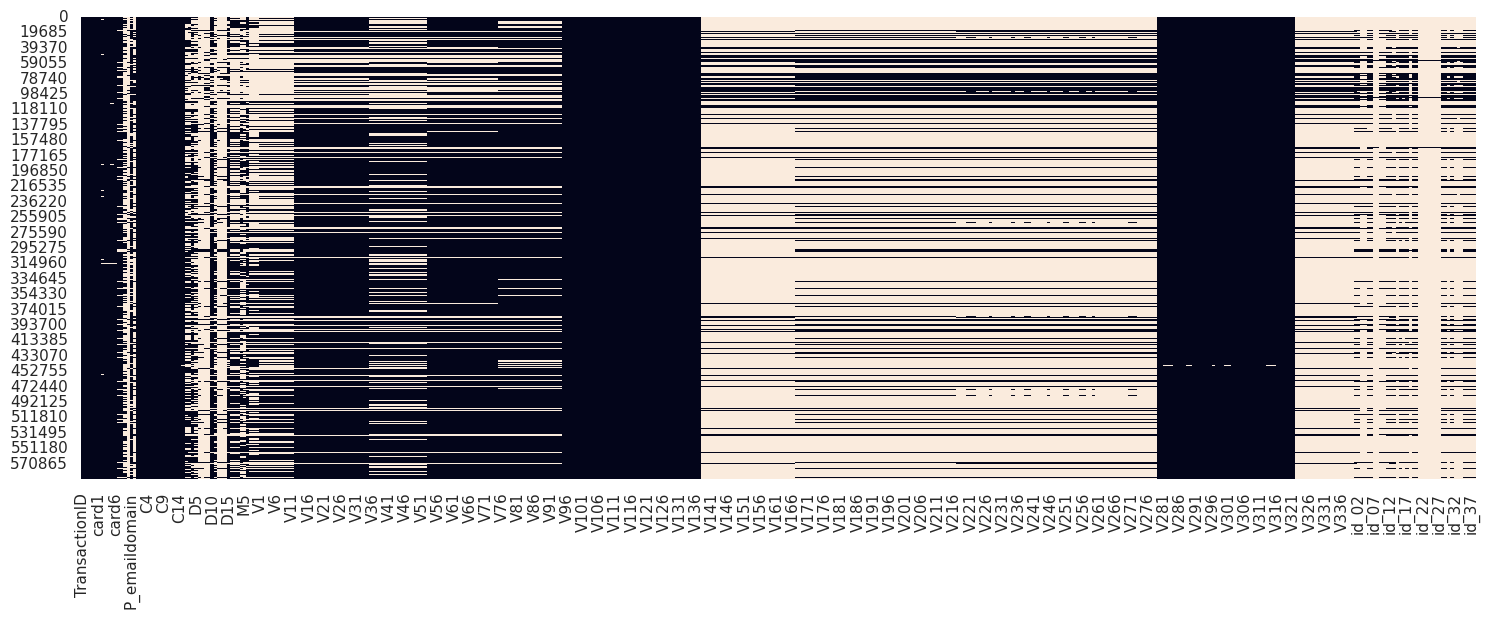

13792

In [ ]:
%matplotlib inline

plt.figure(figsize=(18, 6))
sns.heatmap(train_data.iloc[:,:-2].isnull(), cbar=False)
plt.show()
plt.close('all')
gc.collect()

In [ ]:
train_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.0000

상품 가격에 대한 3-sigma rule 시각화

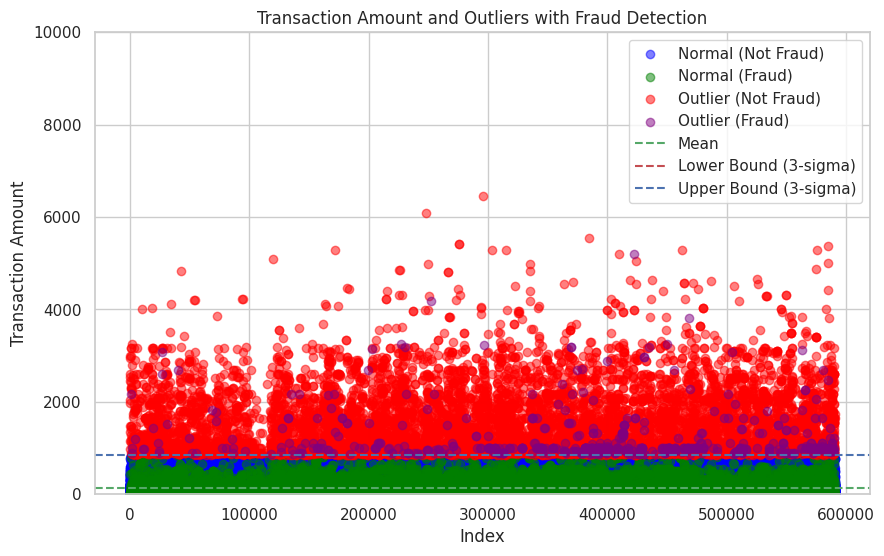

In [ ]:
# TransactionAmt 열의 평균과 표준편차 계산
mean_amt = train_trans['TransactionAmt'].mean()
std_amt = train_trans['TransactionAmt'].std()

# 3-Sigma 범위 계산
lower_bound = mean_amt - 3 * std_amt
upper_bound = mean_amt + 3 * std_amt

# 이상치 표시를 위한 조건
train_trans['IsOutlier'] = (train_trans['TransactionAmt'] < lower_bound) | (train_trans['TransactionAmt'] > upper_bound)

# 전체 데이터와 이상치 시각화
plt.figure(figsize=(10, 6))

# 이상치 아닌 데이터 중 정상 거래
plt.scatter(train_trans[(~train_trans['IsOutlier']) & (train_trans['isFraud'] == 0)].index,
            train_trans[(~train_trans['IsOutlier']) & (train_trans['isFraud'] == 0)]['TransactionAmt'],
            color='blue', label='Normal (Not Fraud)', alpha=0.5)

# 이상치 아닌 데이터 중 사기 거래
plt.scatter(train_trans[(~train_trans['IsOutlier']) & (train_trans['isFraud'] == 1)].index,
            train_trans[(~train_trans['IsOutlier']) & (train_trans['isFraud'] == 1)]['TransactionAmt'],
            color='green', label='Normal (Fraud)', alpha=0.5)

# 이상치 데이터 중 정상 거래
plt.scatter(train_trans[(train_trans['IsOutlier']) & (train_trans['isFraud'] == 0)].index,
            train_trans[(train_trans['IsOutlier']) & (train_trans['isFraud'] == 0)]['TransactionAmt'],
            color='red', label='Outlier (Not Fraud)', alpha=0.5)

# 이상치 데이터 중 사기 거래
plt.scatter(train_trans[(train_trans['IsOutlier']) & (train_trans['isFraud'] == 1)].index,
            train_trans[(train_trans['IsOutlier']) & (train_trans['isFraud'] == 1)]['TransactionAmt'],
            color='purple', label='Outlier (Fraud)', alpha=0.5)

plt.axhline(y=mean_amt, color='g', linestyle='--', label='Mean')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound (3-sigma)')
plt.axhline(y=upper_bound, color='b', linestyle='--', label='Upper Bound (3-sigma)')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.ylim(0, 10000)
plt.title('Transaction Amount and Outliers with Fraud Detection')
plt.legend()
plt.show()
# 가격이 정상 범주에 있을 때에는 사기에 대한 건은 없지만
# 가격이 어느정도 소폭 상승했을 때에 사기 거래의 흔적이 보이곤 한다.

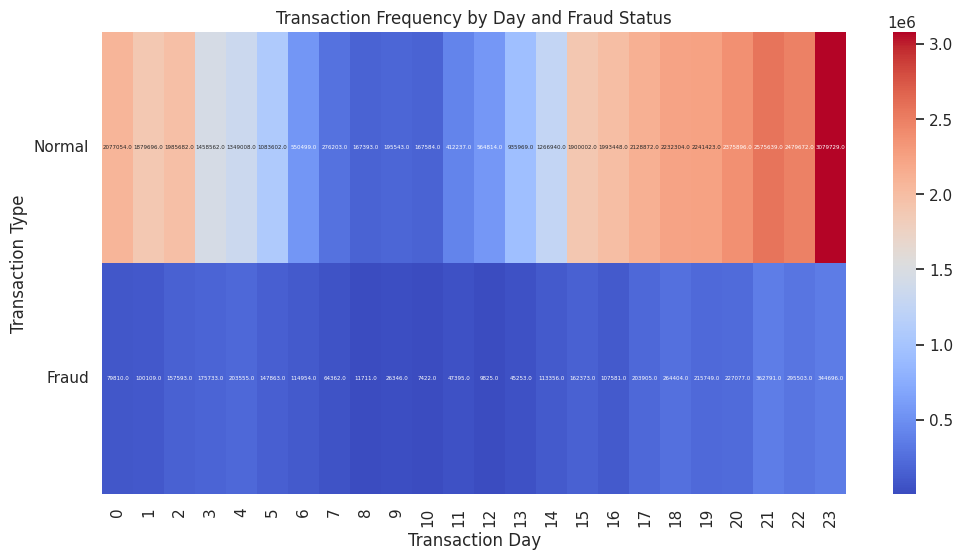

In [ ]:
# 시간을 일정 간격으로 나누기
train_data['TransactionDay'] = (train_data['TransactionDT'] // 3600) % 24  # 시간 단위로 나누고 24시간 형식으로 변환

# 거래 빈도 합산
train_data['TotalTransactions'] = train_data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']].sum(axis=1)

# 정상 거래와 사기 거래로 나누기
normal_transactions = train_data[train_data['isFraud'] == 0].groupby('TransactionDay')['TotalTransactions'].sum()
fraud_transactions = train_data[train_data['isFraud'] == 1].groupby('TransactionDay')['TotalTransactions'].sum()

# 히트맵 데이터 준비
heatmap_data = pd.DataFrame({
    'Normal': normal_transactions,
    'Fraud': fraud_transactions
}).fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='coolwarm', annot=True, fmt='.1f',annot_kws={"size": 4})
plt.title('Transaction Frequency by Day and Fraud Status')
plt.xlabel('Transaction Day')
plt.ylabel('Transaction Type')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

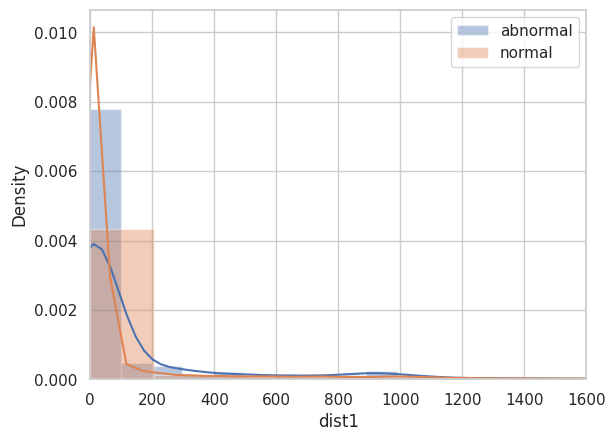

In [ ]:
sns.distplot( train_data[train_data['isFraud']==1]['dist1'], label='abnormal');
plt.xlim(0, 1600)
sns.distplot( train_data[train_data['isFraud']==0]['dist1'], label="normal");
plt.xlim(0, 1600)
plt.legend();

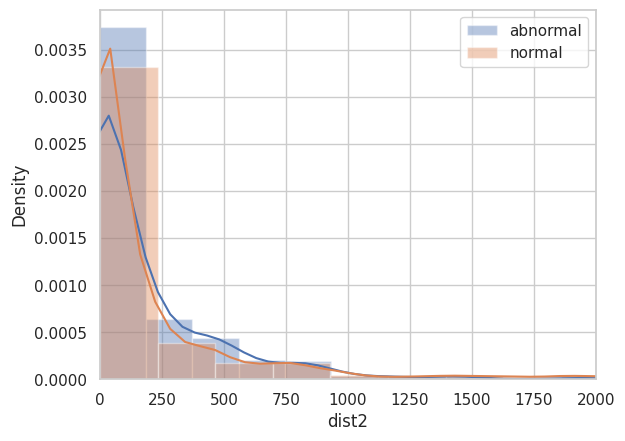

In [ ]:
sns.distplot( train_data[train_data['isFraud']==1]['dist2'], label='abnormal');
plt.xlim(0, 2000)
sns.distplot( train_data[train_data['isFraud']==0]['dist2'], label="normal");
plt.xlim(0, 2000)
plt.legend();

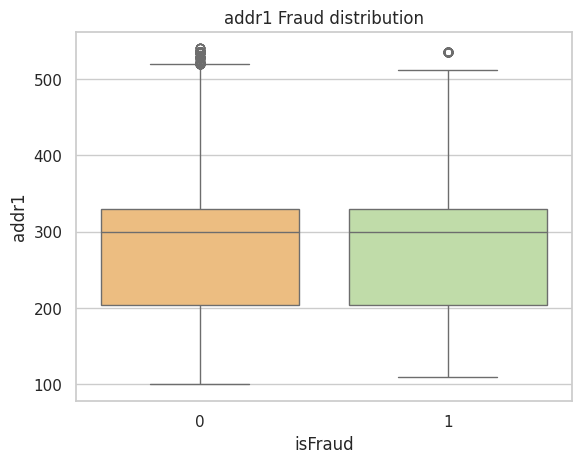

In [ ]:
# ▶ Box plot 활용 클래스 별 데이터 비교
addr1_box = sns.boxplot(data=train_data, x='isFraud', y='addr1', palette='Spectral')
addr1_box.set_title("addr1 Fraud distribution");
# Fraud인 경우 이상치가 한 점에 몰려있는 것을 볼 수 있다.
# 근데 이게 유용할지는..

In [ ]:
train_data['M4']

0          M2
1          M0
2          M0
3          M0
4         NaN
         ... 
590535     M0
590536     M0
590537    NaN
590538     M0
590539    NaN
Name: M4, Length: 590540, dtype: object

In [ ]:
outlier_count / len(train_data['TransactionAmt']) * 100

1.7091136925525792

In [ ]:
outlier_count = train_trans['IsOutlier'].sum()

In [ ]:
len(train_trans['IsOutlier']) - train_trans['IsOutlier'].sum()

580447

In [ ]:
train_trans['IsOutlier'].sum()

10093

In [ ]:
10093/580447 # 1.73%

0.017388323137168423

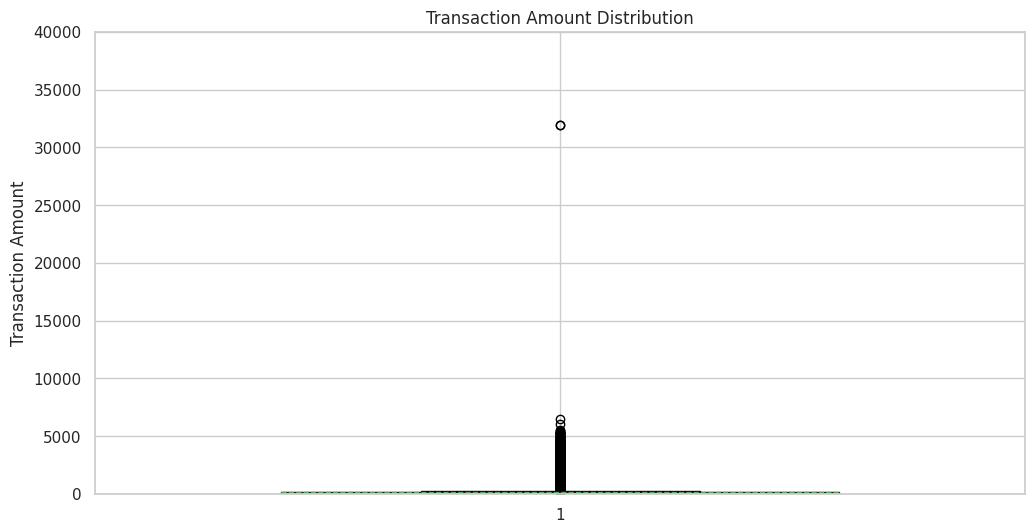

In [ ]:
# 박스 플롯 생성
plt.figure(figsize=(12, 6))  # 그래프의 크기 조절
plt.boxplot(train_trans['TransactionAmt'], widths=0.6, vert=True, patch_artist=True, meanline=True, showmeans=True)
plt.ylim(0, 40000)  # y축 범위 설정
plt.title('Transaction Amount Distribution')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Boxplot of dist2')

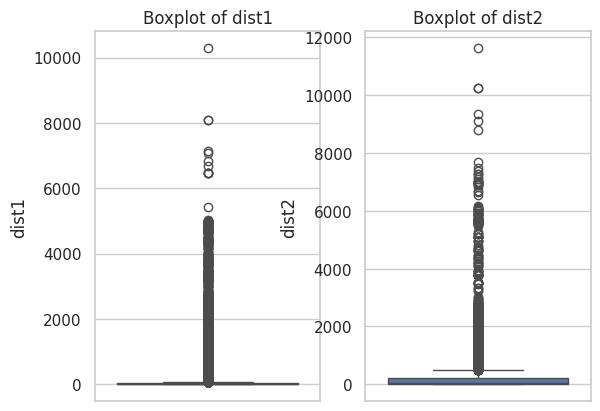

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(y=train_data['dist1'])
plt.title('Boxplot of dist1')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['dist2'])
plt.title('Boxplot of dist2')

In [ ]:
def plot_3sigma_rule(column):
    mean = train_trans[column].mean()
    std = train_trans[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    plt.figure(figsize=(10, 4))
    plt.hist(train_trans[column], bins=50, alpha=0.6, color='g', edgecolor='black')
    plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
    plt.title(f'3-Sigma Rule for {column}')
    plt.xlabel(column)
    plt.xlim(0, 3000)
    plt.ylabel('Frequency')
    plt.show()

    print(f'{column}: Mean = {mean}, Std = {std}')
    print(f'{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}')

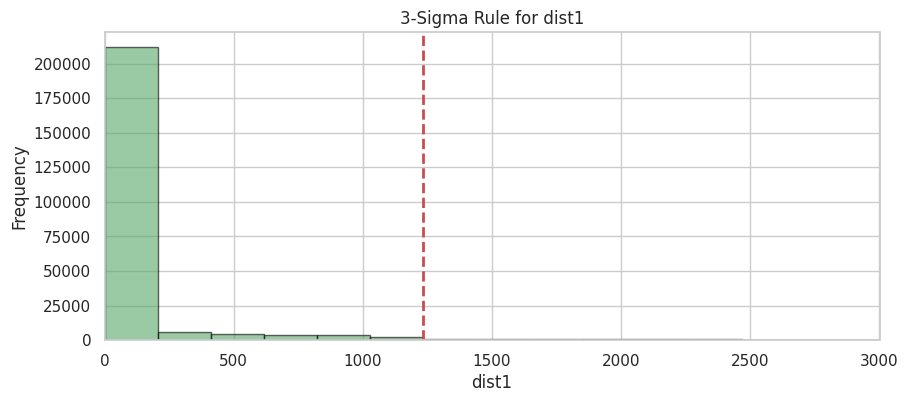

dist1: Mean = 118.50218030881064, Std = 371.8720264911674
dist1: Lower Bound = -997.1138991646915, Upper Bound = 1234.1182597823129


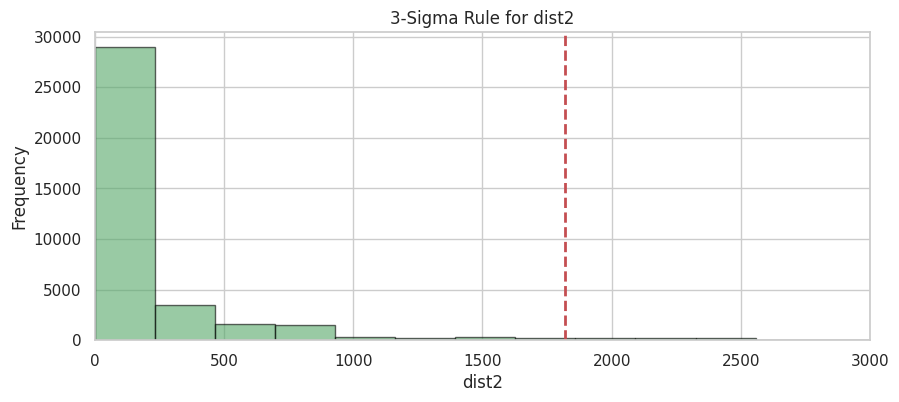

dist2: Mean = 231.85542296754988, Std = 529.0534935529507
dist2: Lower Bound = -1355.3050576913022, Upper Bound = 1819.015903626402


In [ ]:
# 3-sigma rule 플롯 생성
plot_3sigma_rule('dist1')
plot_3sigma_rule('dist2')

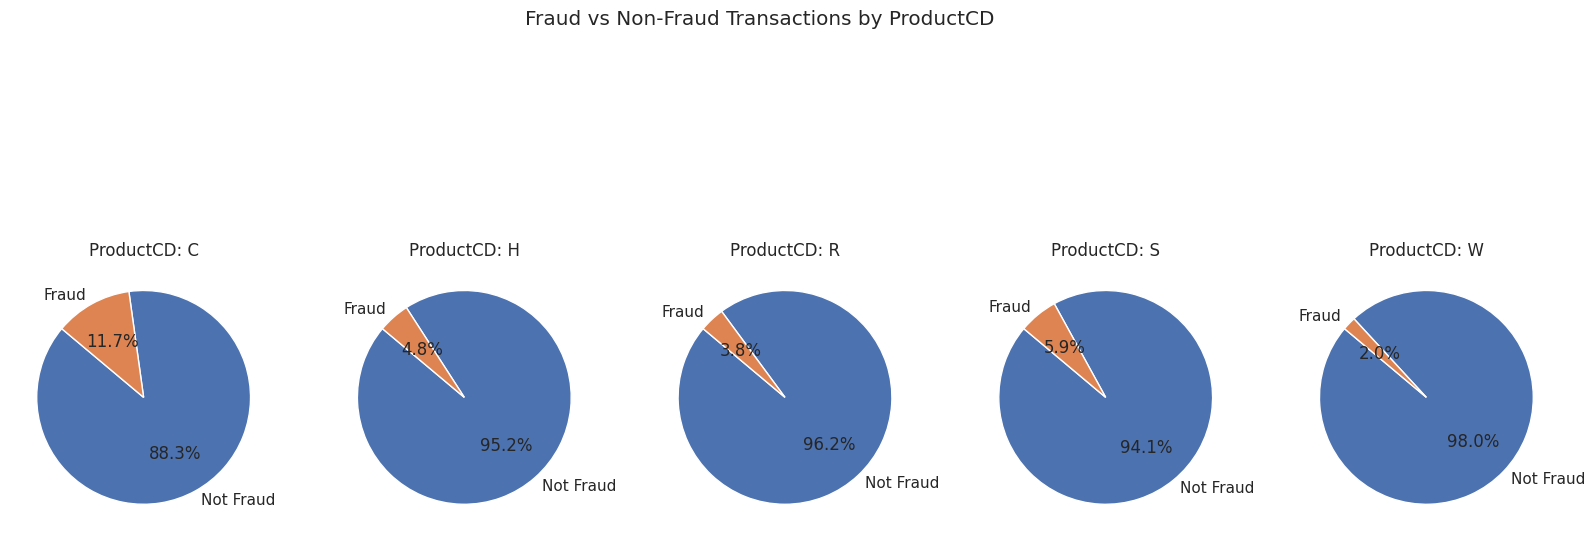

In [ ]:
product_fraud_counts = train_data.groupby('ProductCD')['isFraud'].value_counts(normalize=True).unstack().fillna(0)
product_fraud_counts.fillna(0, inplace=True)

# 파이 그래프 시각화
fig, axes = plt.subplots(1, len(product_fraud_counts), figsize=(20, 8))

for i, (product, counts) in enumerate(product_fraud_counts.iterrows()):
    axes[i].pie(counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'ProductCD: {product}')

plt.suptitle('Fraud vs Non-Fraud Transactions by ProductCD')
plt.show()
# 각 제품 종류마다 사기의 비율을 확인했을 때 C 제품군이 사기 비율이 높은 것을 확인할 수 있다.

In [1]:
M_columns = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

# 각 M 컬럼에 대해 T와 F일 때의 isFraud 값의 평균 계산 및 시각화
fraud_means = []

for col in M_columns:
    fraud_mean = train_data.groupby(col)['isFraud'].mean()
    fraud_means.append(fraud_mean)
    print(f"\n{col} 컬럼의 T와 F에 따른 isFraud 비율:")
    print(fraud_mean)

# 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(14, 8))
index = np.arange(len(M_columns))
bar_width = 0.35

T_means = [mean['T'] if 'T' in mean.index else 0 for mean in fraud_means]
F_means = [mean['F'] if 'F' in mean.index else 0 for mean in fraud_means]

bar1 = ax.bar(index, T_means, bar_width, label='T')
bar2 = ax.bar(index + bar_width, F_means, bar_width, label='F')

ax.set_xlabel('M Columns')
ax.set_ylabel('Fraud Rate')
ax.set_title('Fraud Rate by Matching Features (M1 to M8)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(M_columns)
ax.legend()

plt.show()
# T라고 해서 Fraud가 아닌 것은 아니지만 F의 비율이 높은 것도 사실

NameError: name 'train_data' is not defined

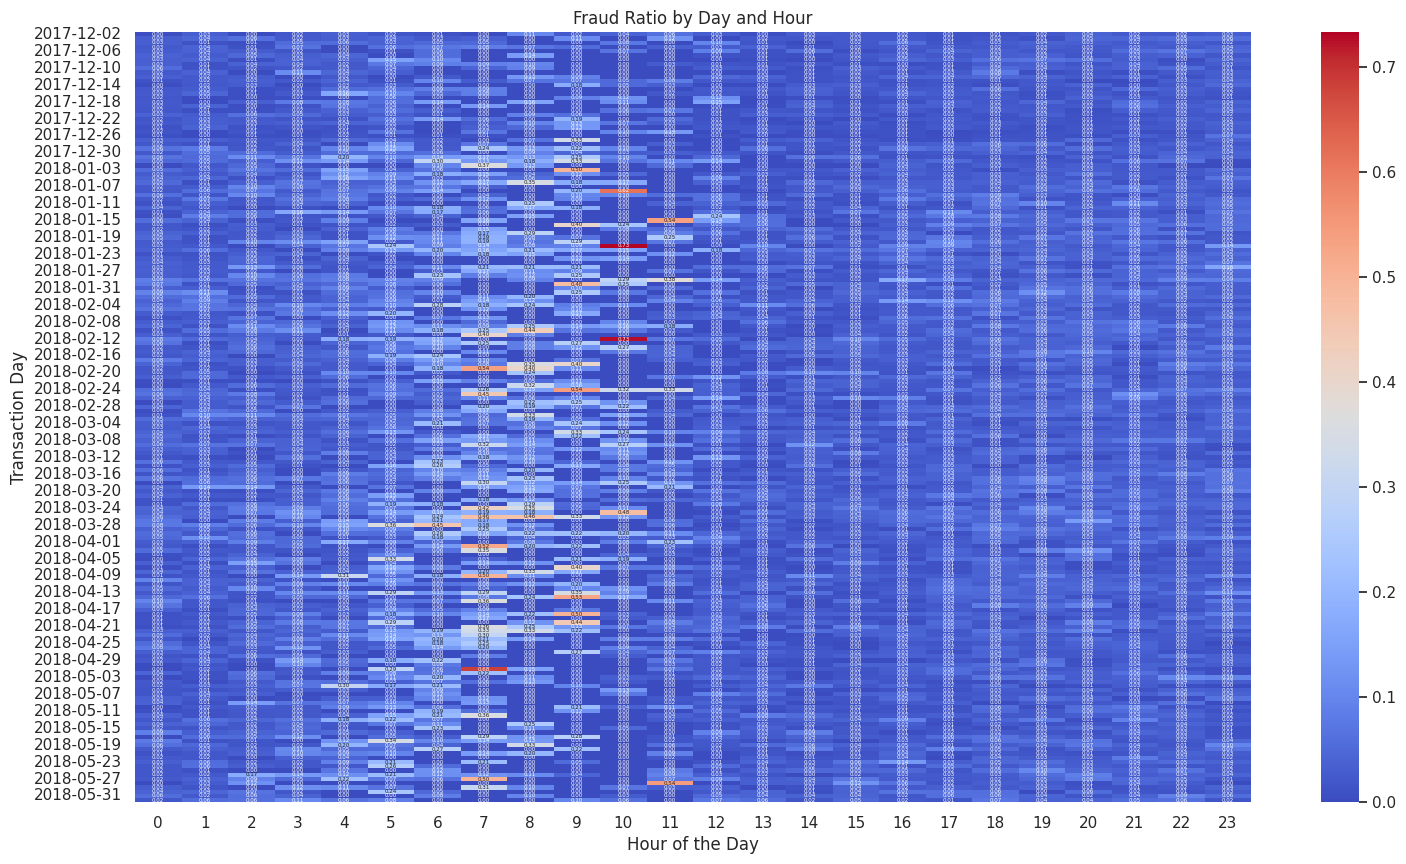

In [ ]:
from datetime import datetime, timedelta
# TransactionDT를 날짜와 시간 형식으로 변환
start_date = datetime(2017, 12, 1)
train_data['TransactionDate'] = train_data['TransactionDT'].apply(lambda x: start_date + timedelta(seconds=x))

# TransactionDate에서 날짜와 시간을 추출
train_data['TransactionDay'] = train_data['TransactionDate'].dt.date
train_data['TransactionHour'] = train_data['TransactionDate'].dt.hour

# 날짜와 시간별로 그룹화하여 사기 거래 비율 계산
hourly_fraud_ratio = train_data.groupby(['TransactionDay', 'TransactionHour'])['isFraud'].mean().unstack()

# 히트맵 시각화
plt.figure(figsize=(18, 10))
sns.heatmap(hourly_fraud_ratio, cmap='coolwarm', annot=True, fmt='.2f',annot_kws={"size": 4})
plt.title('Fraud Ratio by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Day')
plt.show()

In [ ]:
train_data = pd.merge(train_trans, train_idf, how='left', on='TransactionID')
test_data = pd.merge(test_trans, test_idf, how='left', on='TransactionID')

In [ ]:
train_data['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [ ]:
fraud_data = train_data.loc[train_data['isFraud'] == 1]
non_fraud_data = train_data.loc[train_data['isFraud'] == 0 ][: 20663]

In [ ]:
sample_data = pd.concat([fraud_data, non_fraud_data], axis = 0)

In [ ]:
sample_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDay,TotalTransactions
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,credit,251.0,87.0,NaN,NaN,aol.com,unknown,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,2.0,57.0,57.0,52.0,0.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,374.0,NaN,NaN,NaN,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,0,8.0
240,2987240,1,90193,37.098,C,13413,103.0,

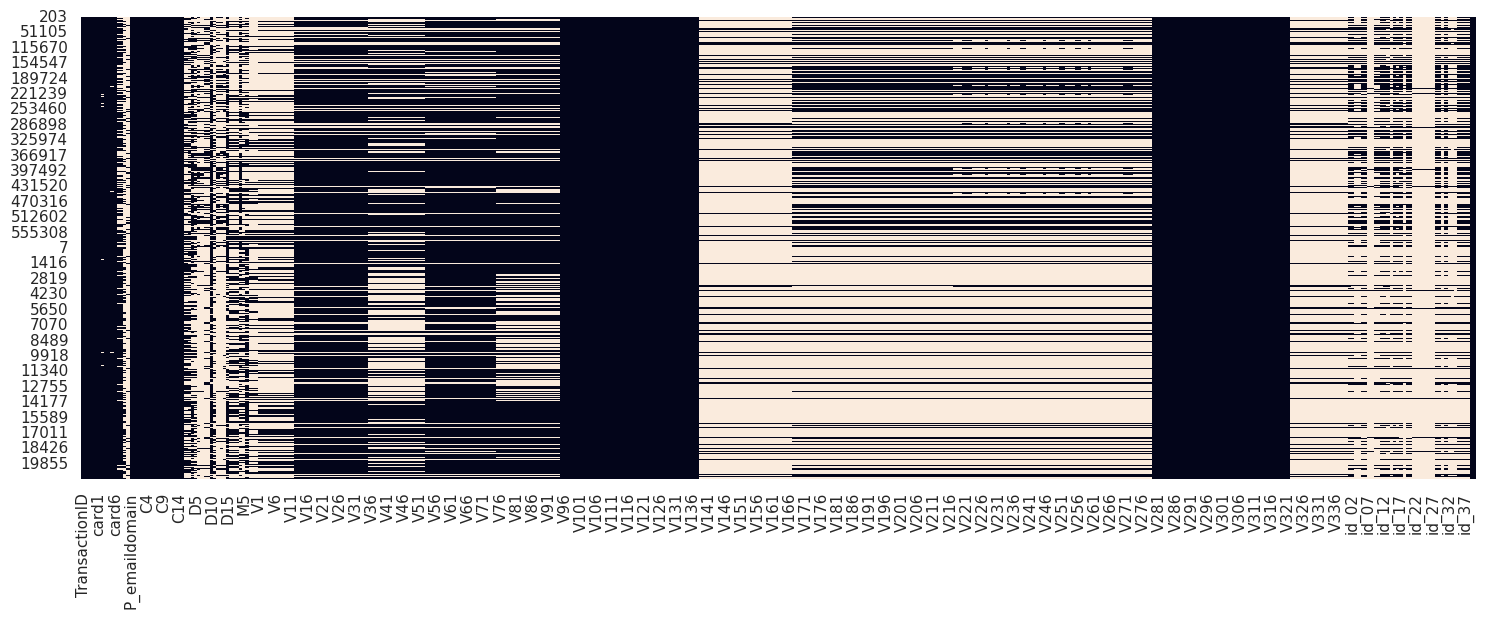

13478

In [ ]:
plt.figure(figsize=(18, 6))
sns.heatmap(sample_data.iloc[:,:-2].isnull(), cbar=False)
plt.show()
plt.close('all')
gc.collect()

In [ ]:
import gc

def encode_LE(columns, train=train_data, test=test_data, verbose=True):
    for col in columns:
        try:
            # 데이터프레임의 특정 컬럼을 선택하여 Series로 연결합니다.
            df_comb = pd.concat([train[col], test[col]], axis=0).reset_index(drop=True)

            # factorize는 Series에 대해 호출해야 하므로, df_comb가 Series임을 확실하게 합니다.
            labels, unique = pd.factorize(df_comb, sort=True)

            # 컬럼 이름을 변수로 저장합니다.
            nm = col

            # 레이블을 원래의 train과 test 데이터에 할당합니다.
            train[nm] = labels[:len(train)]
            test[nm] = labels[len(train):]

            # 사용한 메모리를 정리합니다.
            del df_comb, labels, unique;
            x = gc.collect()

            # 작업 진행 상황을 출력합니다.
            if verbose:
                print(f"Column {nm} encoded, ", end='')
        except Exception as e:
            print(f"Error encoding {col}: {str(e)}")


In [ ]:
numerical_columns = ['TransactionAmt', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C7', 'C8', 'C9', 'C10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'TransactionDT', 'dist1', 'dist2', 'TransactionID']

In [ ]:
categorical_columns = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'ProductCD', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo', 'M4', 'addr1', 'addr2']

In [ ]:
categorical_columns += id_columns

In [ ]:
id_columns

['id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [ ]:
id_columns = []
for col in train_data.columns:
  if 'id' in col:
    id_columns.append(col)

In [ ]:
tf_columns = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8']

In [ ]:
for col in tf_columns:
  train_data[col] = train_data[col].map({"T":0, "F":1 })
  test_data[col] = test_data[col].map({"T":0, "F":1 })

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 수치형 컬럼만 선택하여 스케일링 적용
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

print(train_data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0        2987000        0      -1.577987       -0.278167          4  13926   
1        2987001        0      -1.577986       -0.443327          4   2755   
2        2987002        0      -1.577972       -0.317889          4   4663   
3        2987003        0      -1.577965       -0.355521          4  18132   
4        2987004        0      -1.577964       -0.355521          1   4497   

   card2  card3  card4  card5  card6  addr1  addr2     dist1  dist2  \
0    NaN  150.0      1  142.0      1  315.0   87.0 -0.267572    NaN   
1  404.0  150.0      2  102.0      1  325.0   87.0       NaN    NaN   
2  490.0  150.0      4  166.0      2  330.0   87.0  0.453108    NaN   
3  567.0  150.0      2  117.0      2  476.0   87.0       NaN    NaN   
4  514.0  150.0      2  102.0      1  420.0   87.0       NaN    NaN   

   P_emaildomain  R_emaildomain        C1        C2        C3        C4  \
0             32             

TruncatedSVD 기본 틀

In [ ]:
print(train_data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0        2987000        0      -1.577987       -0.278167          4  13926   
1        2987001        0      -1.577986       -0.443327          4   2755   
2        2987002        0      -1.577972       -0.317889          4   4663   
3        2987003        0      -1.577965       -0.355521          4  18132   
4        2987004        0      -1.577964       -0.355521          1   4497   

   card2  card3  card4  card5  card6  addr1  addr2     dist1  dist2  \
0    NaN  150.0      1  142.0      1  315.0   87.0 -0.267572    NaN   
1  404.0  150.0      2  102.0      1  325.0   87.0       NaN    NaN   
2  490.0  150.0      4  166.0      2  330.0   87.0  0.453108    NaN   
3  567.0  150.0      2  117.0      2  476.0   87.0       NaN    NaN   
4  514.0  150.0      2  102.0      1  420.0   87.0       NaN    NaN   

   P_emaildomain  R_emaildomain        C1        C2        C3        C4  \
0             32             

In [ ]:
for col in categorical_columns:
    if train_data[col].dtype == 'object' or train_data[col].dtype == 'category':
        # 문자열로 된 범주형 데이터는 그대로 인코딩
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
    elif np.issubdtype(train_data[col].dtype, np.number) and len(train_data[col].unique()) < 10:
        # 숫자로 된 범주형 데이터는 문자열로 변환 후 인코딩
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))

In [ ]:
for col in id_columns:
    if train_data[col].dtype == 'object' or train_data[col].dtype == 'category':
        # 문자열로 된 범주형 데이터는 그대로 인코딩
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
    elif np.issubdtype(train_data[col].dtype, np.number) and len(train_data[col].unique()) < 10:
        # 숫자로 된 범주형 데이터는 문자열로 변환 후 인코딩
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))

In [ ]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,-1.577987,-0.278167,4,13926,NaN,150.0,1,142.0,1,315.0,87.0,-0.267572,NaN,32,32,-0.098020,-0.092260,-0.037493,-0.059438,-0.21606,-0.112869,-0.046146,-0.053939,-0.208712,-0.054826,2.0,0.0,1.0,1.0,-0.509625,NaN,-0.245948,NaN,NaN,NaN,NaN,NaN,NaN,-0.607738,-0.718232,NaN,NaN,NaN,-0.807712,0.0,0.0,0.0,2,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2,2,2,74,103,4,260,4,2,2,2,2,2,1742
1,2987001,0,-1.577986,-0.443327,4,2755,404.0,150.0,2,102.0,1,3

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_components = 2  # 원하는 차원 수
svd = TruncatedSVD(n_components=n_components, random_state=42)

combined_data = pd.concat([train_data, test_data], axis = 0)

# Truncated SVD 변환
svd_transformed = svd.fit_transform(combined_data)

# 변환된 데이터를 다시 분리
train_data_svd = svd_transformed[:len(train_data)]
test_data_svd = svd_transformed[len(train_data):]

print("Train Data Shape after SVD:", train_data_svd.shape)
print("Test Data Shape after SVD:", test_data_svd.shape)

ValueError: could not convert string to float: 'W'

In [ ]:
train_data.drop(columns=['D9'], inplace=True)
test_data.drop(columns=['D9'], inplace=True)

In [ ]:
train_data[numerical_columns] = train_data[numerical_columns].fillna(-1)
test_data[numerical_columns] = test_data[numerical_columns].fillna(-1)

ValueError: Columns must be same length as key

In [ ]:
def process_tf_columns(train, test, columns):
    # 'T', 'F' 값을 1과 0으로 변환
    for col in columns:
        train[col] = train[col].map({'T': 1, 'F': 0}).astype(int)
        test[col] = test[col].map({'T': 1, 'F': 0}).astype(int)

In [ ]:
df_copy = train_data.copy()

# 결측치를 처리한 후 원본 데이터프레임에 통합
processed_data = {}
for column in df_copy.columns:
    # 각 열을 기준으로 결측치를 제거한 데이터프레임 생성
    temp_df = df_copy[[column]].dropna()

    # 원본 데이터프레임에 결측치가 없는 행을 통합
    df_copy = pd.merge(df_copy, temp_df, left_index=True, right_index=True, suffixes=('', '_processed'))

    # 처리된 데이터 추가
    processed_data[column] = df_copy[column + '_processed']

# 결측치가 없는 열만 남긴 데이터프레임 생성
processed_df = pd.DataFrame(processed_data)

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [ ]:
target_index = train_data.columns.get_loc('isFraud')
X = train_data.iloc[:, train_data.columns != 'target']
y = train_data.drop(columns = 'isFraud')

In [ ]:
from sklearn.ensemble import IsolationForest

isol_for = IsolationForest(random_state = 42)
isol_for.fit(X, y)

TypeError: LabelEncoder.fit_transform() missing 1 required positional argument: 'X'

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

def preprocess_and_svd(train_data, test_data, numerical_columns, categorical_columns, n_components=2):
    # 라벨 인코딩 함수 정의
    def label_encode_columns(df, columns):
        for col in columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
        return df

    # 범주형 열 라벨 인코딩 적용
    train_data = label_encode_columns(train_data, categorical_columns)
    test_data = label_encode_columns(test_data, categorical_columns)

    # ColumnTransformer를 사용하여 수치형 컬럼은 스케일링
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns)
        ], remainder='passthrough')

    # Truncated SVD 적용
    svd = TruncatedSVD(n_components=n_components, random_state=42)

    # 파이프라인 생성
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', svd)
    ])

    # 훈련 데이터와 테스트 데이터 결합
    combined_data = pd.concat([train_data, test_data])

    # Truncated SVD 변환
    svd_transformed = pipeline.fit_transform(combined_data)

    # 변환된 데이터를 다시 분리
    train_data_svd = svd_transformed[:len(train_data)]
    test_data_svd = svd_transformed[len(train_data):]

    return train_data_svd, test_data_svd